In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"..\Datasets\placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df=df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
import matplotlib.pyplot as plt

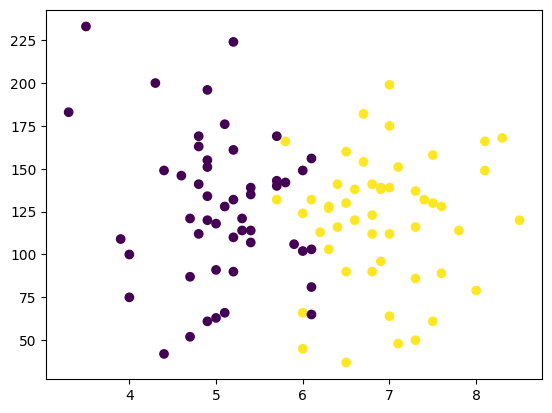

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) # x axis 1st, y axis next value,c=colour

In [9]:
df['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [10]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [11]:
x.shape

(100, 2)

In [12]:
y.shape

(100,)

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=27)

In [20]:
x_train.shape

(90, 2)

In [21]:
y_train.shape

(90,)

In [22]:
x_test.shape

(10, 2)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [24]:
x_train_scaled=scaler.fit_transform(x_train)


In [25]:
x_test_scaled=scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [27]:
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_predict=model.predict(x_test_scaled)

In [29]:
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [30]:
y_test

89    0
68    0
43    1
50    0
40    0
95    0
27    1
85    1
22    0
44    1
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8

In [32]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

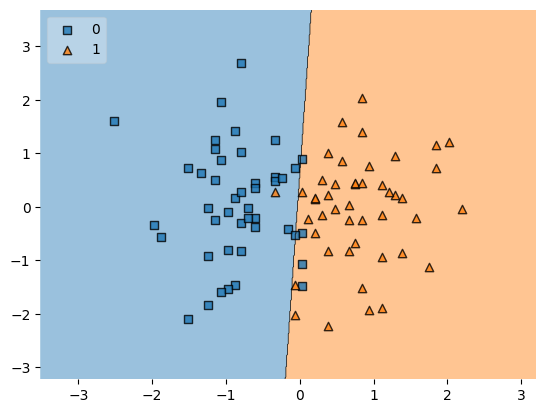

In [33]:
plot_decision_regions(x_train_scaled,y_train.values,clf=model,legend=2)

In [34]:
import pickle

In [35]:
pickle.dump(model,open('model_LR.pkl','wb'))